# SALES FORECASTING USING MACHINE LEARNING

Sales forecasting is one of the important technique in businesses which is used to estimate the future sales trend. The historical data of the business is analysed to predict the future sales. Machine larning algorithm is useful method to analyse and forecast future sales of an organistaion. Machine leraning models are very much effective in perforning time series analysis and sales forecasting. The forevasted sales helps to optimse inventory resources of a business. This project incudes sales analysis and forecasting of a retail store by using machine learning models. The main aim of the project is to predict sales trend of the retail store for the year 2025. The retail store inventory data is used in this process. The dataset includes the deailed information of the inventory and sales. ARIMA model is developed to forecast the future sales trend of the retail store. The main aim of the project is to predict sales trend of the retail store for the year 2025. The sales forecasting help the organisations to make effective decisions.

## Installing libraries

In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

The above code includes the imported libraraies that are important to perform data preprocessing, data analysis, data visualisation and model development. Libraries that are used to build the time series forecasting models such as ARIMA and SARIMAX are also imprted in the above code.  

## Loading the dataset

In [4]:
df= pd.read_csv("retail_store_inventory.csv")

The dataset "retail_store_inventory.csv" is loaded in the python environment using the above code. The datset is defined in the "df" dataframe.

In [5]:
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [6]:
df.tail(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


The first five rows and last five rows of the dataset are shown in the above outputs. It is shown that the dataset has 15 columns that include the detailed sales information of the retail store. The dataset has the sales details of two years starting from January 2022 to January 2024. It includes 15 columns, these are:

__1. Date__: The date column stores the dates on which each product is sold.

__2. Store ID__: The ID of each retail store.

__3. Product ID__: The ID of each product.

__4. Category__: The category of sold products such as furniture, toys, clothing, etc.

__5. Region__: Stores the information of the sales regions.

__6. Inventory Level__: Available stocks of products at the beginning of the day.

__7. Units Sold__: Sold units of each product during the day.

__8. Units ordered__: The number of units ordered.

__9. Demand Forecast__: The predicted demand for products based on the previous trends.

__10. Price__: The price of each product unit.

__11. Discount__: The rate of discount on the products.

__12. Weather Condition__: The weather conditions when the product is sold.

__13. Holiday/Promotion__: The indication of holidays or promotions.

__14. Competitor Pricing__: Product price of the competitors.

__15. Seasonality__: Seasons on which the products are sold.

## Data preprocessing

Data preprocessing is one of the important stages in data analysis. The dataset is prepared for data analysis and machine learning in this process. The data preprocessing of retail store data includes two main steps that are:

* __Converting Date column__: The dates of the Date column are transformed into datetime format. Initially the data type of 'Date' column is 'object' which is not the preferred data type for dates. So, the data type of 'Date' column is transformed from object to 'datetime' format for effective data analysis.

* __Checking missing values__: The number of missing values present in the dataset is identified through this process.

In [33]:
df.shape

(73100, 15)

The shape of the dataset which means the number of rows and the number of columns are identfied using df.shape() function. It is seen from the output that the dataset has 73100 rows and 15 columns

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

The variables of the dataset have three types that are object, int64 and float64. Three variables are float64, five variables are int64 and seven columns are object. 

In [35]:
# Summary statistics
print('Summary statistics')
df.describe()

Summary statistics


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


The charactersistcs and distrbution of the retail sales data is evaluated through this process. The statistical details of all the variables are measured using eight properties that are count, mean, std, min, 25%, 50%, 75% and max. It is shown that the dataset has 73,100 counts for each variable which means that the dataset has 73,100 number of slaes records. The mean value of the "Inventory Level" is 274 which means that the inventory of the retail store manages average of 274 products. Also, the statistics show that the average price of the products on the retail store is 55. Consequently, the statistics show the detailed distribution of each sales properties of the retail store. 

In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

The above code is used to convert the data type of the date column. It converts the data type of the 'Date' column from object to datetime format.

In [9]:
print(df['Date'])

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
73095   2024-01-01
73096   2024-01-01
73097   2024-01-01
73098   2024-01-01
73099   2024-01-01
Name: Date, Length: 73100, dtype: datetime64[ns]


The above output shows that data type of the Date column is converted into datetime format which is datetime64.

In [38]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

The above process is adapted to check any missing values in the dataset. It is seen from the above output that the dataset does not has any missing values.

In [39]:
print(df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


The names of all the 15 columns are shown in the above output. These columns will be used to perform further analysis as the dataset is ready for data analysis and machine learning.

## Exploratory Data Analysis

Exploratory Data Analysis is one of the important processes in data analysis. This process is used to evaluate the information of the dataset which helps to understand the nature of the dataset. Different types of charts are used in this process to plot data patterns in an effective manner. The used chart types in this process include line plot, box plot, pie chart, bar plot etc. Multiple types of colours are used to plot different data points in a plot which helps to identify insights easily.

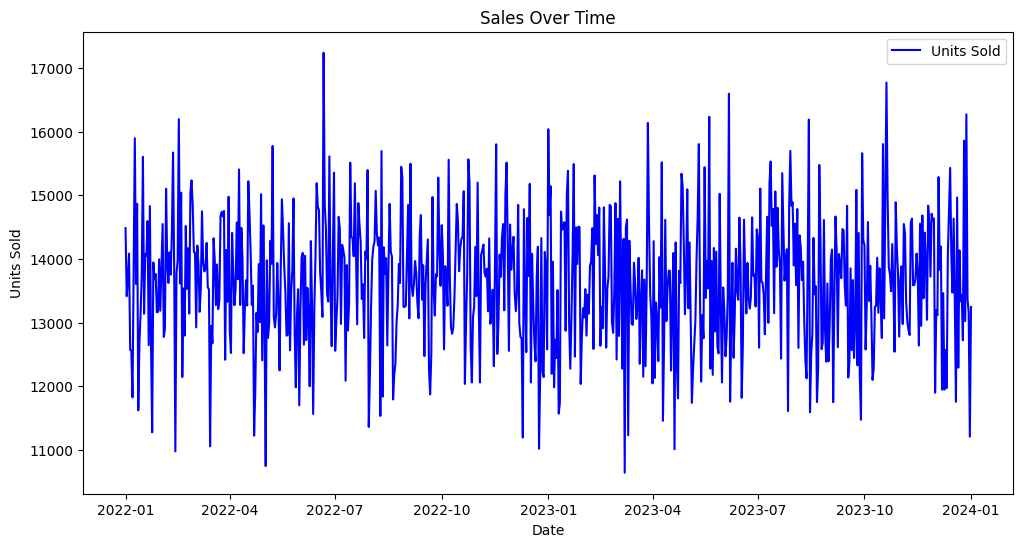

In [40]:
# Sales trend over time
time_series_data = df.groupby('Date')['Units Sold'].sum().reset_index()
time_series_data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Units Sold', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

The above plot shows the sales trend from 2022 to 2024. It evalutes the amount of sold products across these 2 years. The visulaisation shows a volatility in the sales trend. It is seen from the plot that the most number products are sold in the middle of year 2022 which is 17000 units. The least number of pruducts sold in 2023-04 which means April, 2023. The amount of units sold at this time is below of 11000 units. 

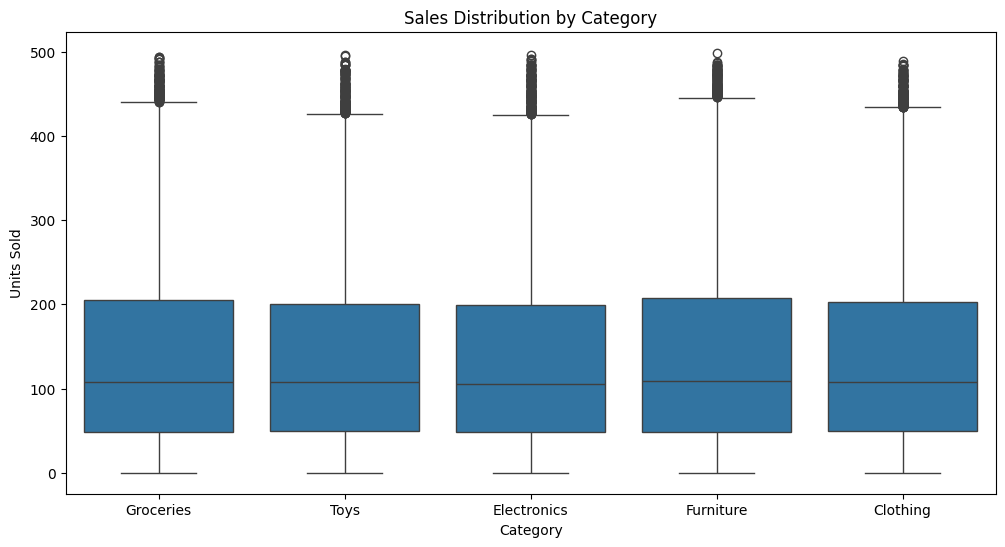

In [41]:
# Sales distribution per category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Units Sold', data=df)
plt.title('Sales Distribution by Category')
plt.show()

The amount of units sold in each category is shown in the above visualisation. The boxplot is used to visualise the distribution of sold units per category. It is seen from the plot that all the product categories have almost same number of sold units.  

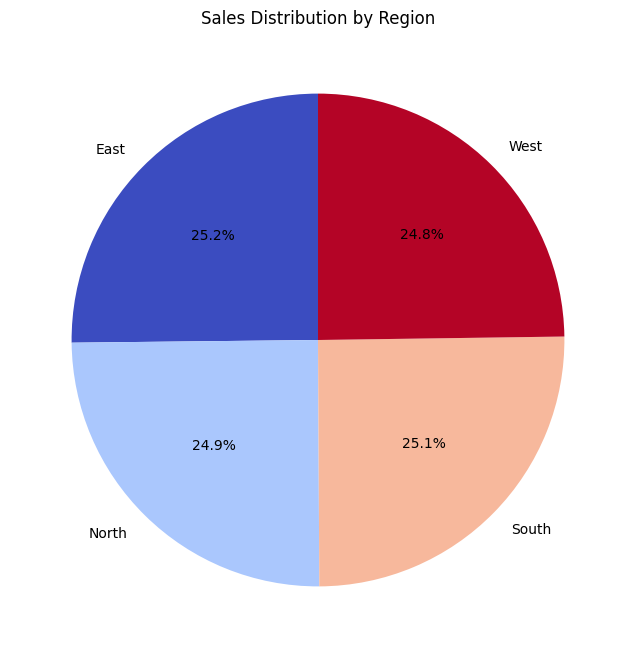

In [42]:
# Pie chart for sales distribution by region
plt.figure(figsize=(8, 8))
df.groupby('Region')['Units Sold'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

The above pie chart shows the rate of sales across the regions. It is seen from the above chart that the sales ditribution across the regions is alomst same which is across 25%. It means that the retail store has a uniform sales rate across all the regions.

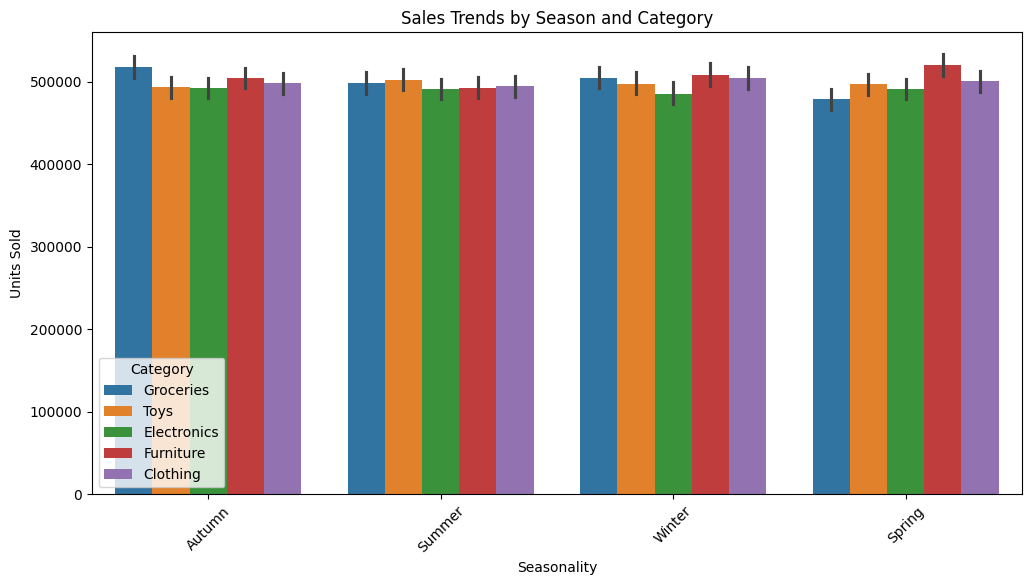

In [43]:
# Sales trends by season and category
plt.figure(figsize=(12, 6))
sns.barplot(x='Seasonality', y='Units Sold', hue='Category', data=df, estimator=sum)
plt.title('Sales Trends by Season and Category')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

The above visualisation shows the sales rate of product categories in each season. The retail store has five type of products that are groceries, toys, electronics, furniture and clothing. Product categories are defined by significant colours that helps to understand catgory distribution in the plot. The sales rate of the product categories are almost same in all seasons. It is seen from the above plot that the total number of sold products across all seasons is around 500000 units. 

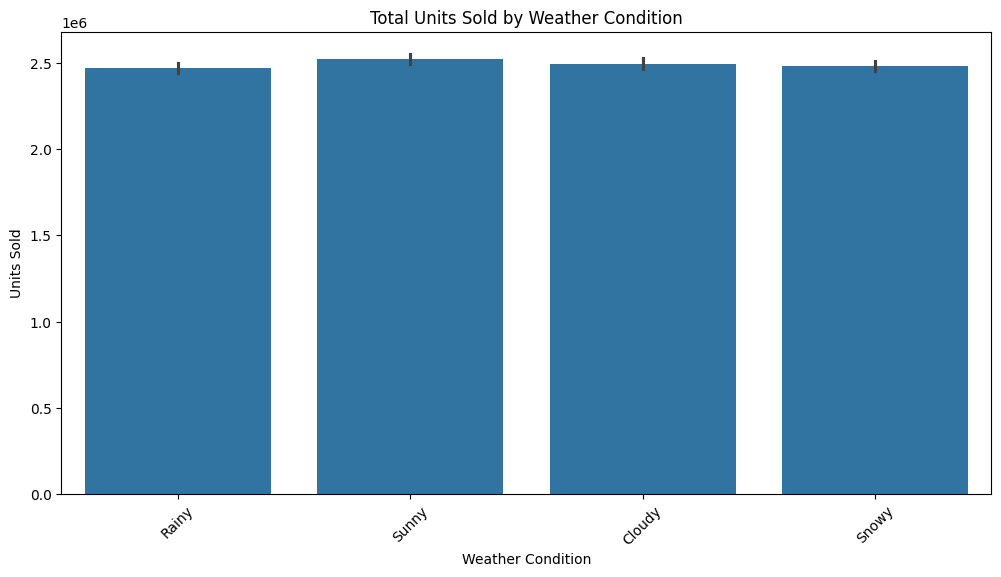

In [44]:
# Units Sold by Weather Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='Weather Condition', y='Units Sold', data=df, estimator=sum)
plt.title('Total Units Sold by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

The number of total sold units in each weather is shown in the above visualisation. The bar chart is used to visualise total sold products in various weather conditions. It is shown that the total number of sold products is almost same in all weather conditions, but it is slightly higher in sunny weather. 

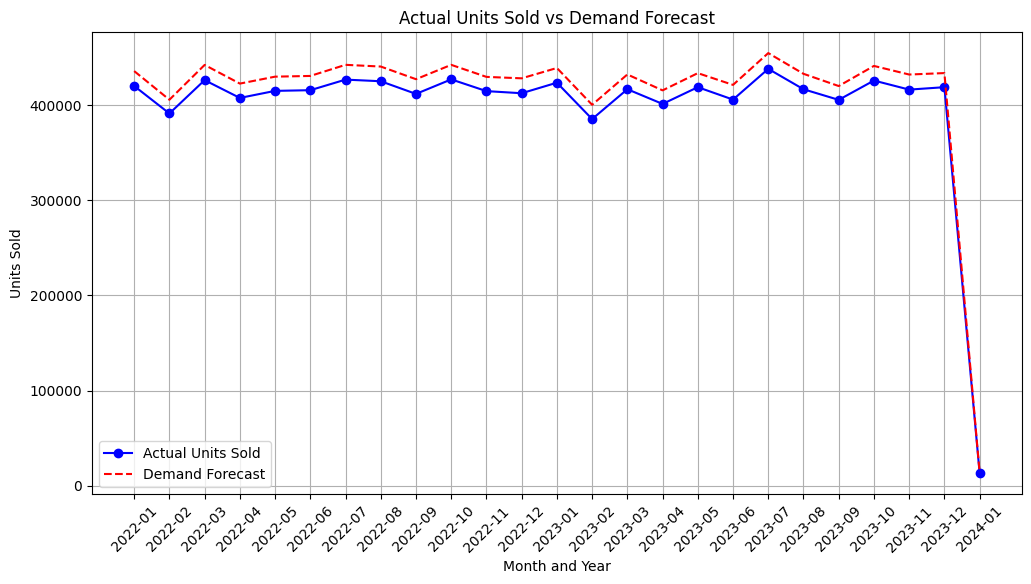

In [45]:
# Calculate the month and year for each entry
df['Month_Year'] = df['Date'].dt.to_period('M')

# Group by 'Month_Year' to aggregate sales and forecast data
time_series_data = df.groupby('Month_Year')[['Units Sold', 'Demand Forecast']].sum().reset_index()

# Plot actual units sold vs. demand forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Month_Year'].astype(str), time_series_data['Units Sold'], label='Actual Units Sold', color='blue', marker='o')
plt.plot(time_series_data['Month_Year'].astype(str), time_series_data['Demand Forecast'], label='Demand Forecast', color='red', linestyle='--')

plt.title('Actual Units Sold vs Demand Forecast')
plt.xlabel('Month and Year')
plt.ylabel('Units Sold')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.show()

The trend between the sold units and forecasted demand is shown in the above visualisation. It evaluates the sold units and demand forecast in each month from 2022 to 2024. The selling rate and demand rate are almost the same from 2022 to 2023, but after the year 2023 the number of sold units decreases as well as the forecasted demand. 

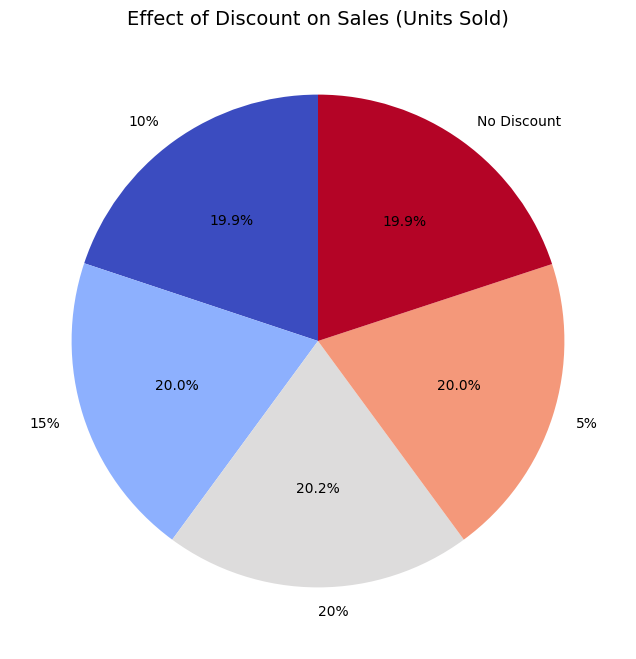

In [46]:

# Format Discount as percentage and replace 0% with 'No Discount'
df['Discount Label'] = df['Discount'].apply(lambda x: f'{x:.0f}%' if x > 0 else 'No Discount')

# Group the data by Discount and sum the Units Sold for each discount level
discount_sales = df.groupby('Discount Label')['Units Sold'].sum()

# Create a pie chart to visualize the effect of Discount on Units Sold
plt.figure(figsize=(8, 8))
discount_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm')

# Add title and labels
plt.title('Effect of Discount on Sales (Units Sold)', fontsize=14)
plt.ylabel('')  # Remove the y-axis label for better visualization

# Show the plot
plt.show()

The effect of the discount rate on the rate of sold products is shown in the above plot. A pie chart is used to plot the distribution of discount rate and rate of sold units. The retail store has four types of discount rates that are 5%, 10%, 15% and 20%. It is seen from the above plot that all the discount rate on the products increases almost same same sales rate. The range of increases in sales rate are 19% to 20%. Besides the applied discount on products, the sales rate of the products is increased by 19.9% normally which is denoted by 'No discoun't' on the plot

## ACF and PACF analysis

Time series analysis needs the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) tools for its execution. ACF serves as a mechanism for analysts to detect data point correlations across both present and past measurements when analyzing trends and seasonal fluctuations. PACF reveals lag effects precisely since it removes factors that could produce false correlations and proves useful for identifying autoregressive process order. 

In [47]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality', 'Month_Year', 'Discount Label']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

The code performs Label Encoding to transform data categories found in the dataset. The program begins by establishing an empty dictionary called label_encoders for storing the column encoders. The program runs a loop through the categorical columns including **_‘Store ID’, ‘Product ID’, ‘Category’_** and additional others. A **_LabelEncoder_** object gets created for each column to fit its distinct values while performing numerical conversion of categorical values. The transformation process makes categorical data suitable for numeric-based machine learning models by converting these variables into numerical values when used together with **_label_encoders_**.

In [48]:
# Set 'Date' as the index of the dataframe
df.set_index('Date', inplace=True)

# Resample the data by month (or quarter) to aggregate sales
df_monthly = df.resample('M').sum()['Units Sold']

C:\Users\Ayushman Deb\AppData\Local\Temp\ipykernel_12348\998407362.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()['Units Sold']


The code establishes the **_'Date'_** column as the indexing system for the DataFrame to create a time series dataset. The data undergoes resampling at 'M' for monthly frequency to create monthly aggregates of the **_'Units Sold'_** values through summation per month..

In [49]:
# First-order differencing to remove trend
df_diff = df_monthly.diff().dropna()

First-order differencing occurs in the code directly to the monthly resampled time series data (df_monthly) for trend removal and achieving stationarity. First-order differencing serves to derive changes between adjacent time points so it helps remove sustained rising or falling trends. First-order differentiation through **_.diff()_** produces the computed differences before **_.dropna()_** completes **_NaN_** elimination of the initial outcome value from differencing. Modeling with **_ARIMA_** requires this transformation for achieving stationarity purposes.

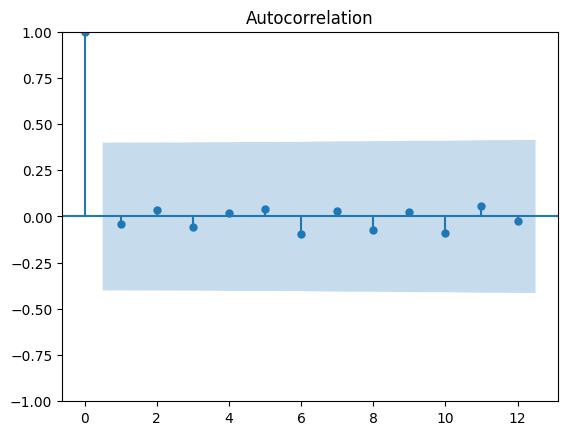

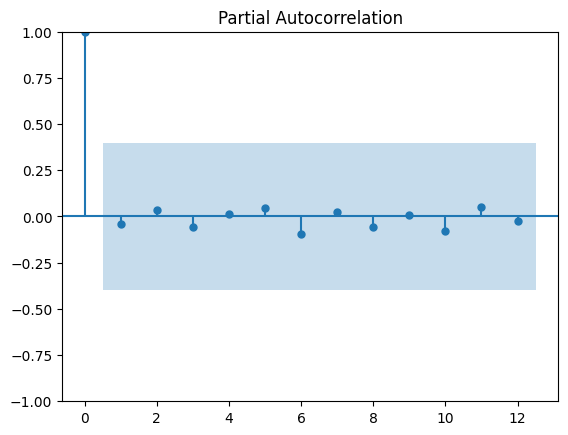

In [50]:
# ACF and PACF plots
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


Autocorrelation function (ACF) and partial autocorrelation function (PACF) of the time series are represented in the first and the second plot respectively. The first lag (or lag 0) has a perfect correlation (of 1.0) in the ACF plot as time series must be fully correlated with itself. But other lags show low correlation values, most of frequency falls in the blue interval of the confidence, signaling that there is no strong autocorrelation in the data. This implies that the series may already be stationary and therefore it may contain no MA or multiplicative parts, in which case it may just be differenced or transformed. The PACF plot has no signals above the lag of 0, which indicates that past values are not influential to future values in any direct manner. This shows a weak autoregressive (AR) portion. These plots overall indicate that the time series might not need further differencing, nor should much effort be expended obtaining a complex ARMA representation for the process.

## SARIMAX Model

In [51]:
# Train-test split (we will use 80% of the data for training)
train, test = train_test_split(df_monthly, test_size=0.2, shuffle=False)

# Fit ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Units Sold   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -212.577
Date:                Mon, 17 Feb 2025   AIC                            431.153
Time:                        22:23:18   BIC                            433.987
Sample:                    01-31-2022   HQIC                           431.633
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6573      0.214     -3.077      0.002      -1.076      -0.239
ma.L1          0.5656      0.227      2.494      0.013       0.121       1.010
sigma2      1.428e+08   4.12e-11   3.46e+18      0.0

Using the **_ARIMA (1,1,1)_**, there is forecasting confidence to past sales affecting future sales as seen in a negative AR (1) coefficient (-0.6573). It indicates an increase in sales in one month is likely to result in a fall in hours sold the next month. The positive MA (1) coefficient (0.5656) is indicating past errors might influence future predictions. **_Heteroskedasticity (H = 5.93, p = 0.05)_** signals varying sales volatility. 

## Sales Prediction

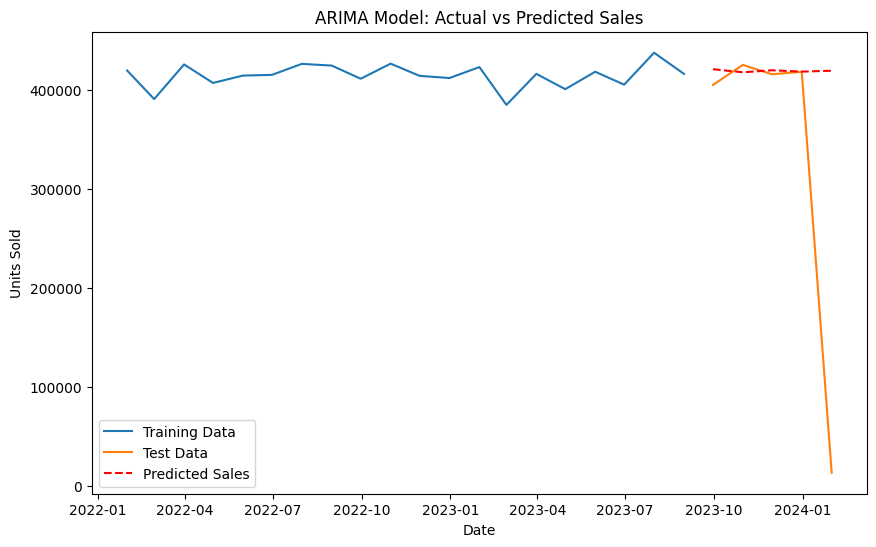

In [52]:
# Forecast sales for the test set
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(test.index, forecast, label='Predicted Sales', color='red', linestyle='--')
plt.title('ARIMA Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

The rate of predicted sales by the ARIMA model is shown in the above plot. The training data is represented by the blue line and is stable in terms of sales over time. For test data, actual sales values are plotted past the training period, and they are represented using the orange line. The predicted sales from the ARIMA model is indicated by red dashed line. It is seen from the plot that the number of predicted sold units is almost 400000.

## Sales forecast

C:\Users\Ayushman Deb\AppData\Local\Temp\ipykernel_12348\2349741015.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_monthly.index[-1], periods=13, freq='M')[1:], forecast_future, label='Future Forecast', color='orange', linestyle='--')


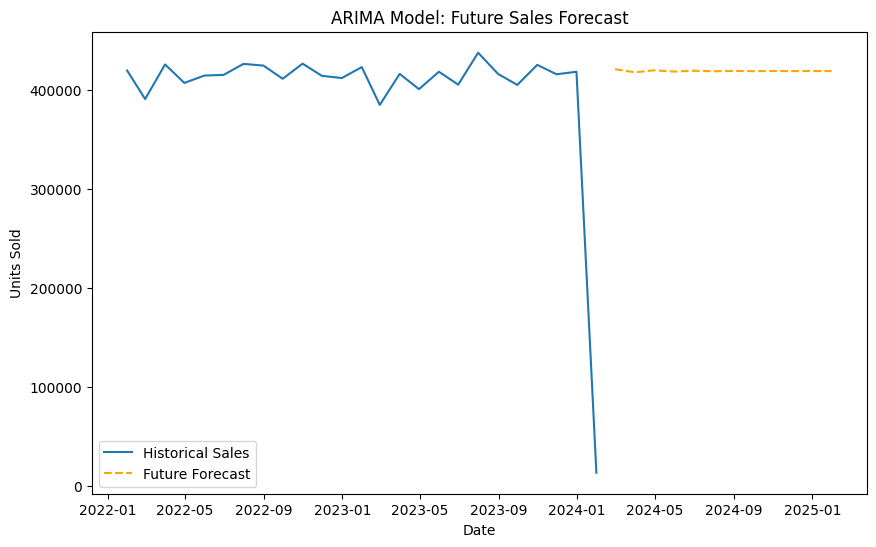

In [53]:
# Forecast next 12 months (or desired period)
forecast_future = model_fit.forecast(steps=12)  # e.g., for next 12 months

# Plot future predictions
plt.figure(figsize=(10,6))
plt.plot(df_monthly, label='Historical Sales')
plt.plot(pd.date_range(df_monthly.index[-1], periods=13, freq='M')[1:], forecast_future, label='Future Forecast', color='orange', linestyle='--')
plt.title('ARIMA Model: Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


The forecast of the ARIMA model shows that the future sales trend is stable, about 420,000 units. This value is underpinned by historical sales data displaying cyclic fluctuations of that value and the model predicts that such pattern will continue in the future. It is seen from the plot that the forecasted sales trend for 2024 and 2025 is 420,000 units.